<a href="https://colab.research.google.com/github/neuroqudit/pykoppu/blob/main/notebooks/03_knapsack_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knapsack Optimization with KOPPU

This notebook demonstrates solving the Knapsack problem, a constrained optimization problem. We aim to maximize the value of items in a knapsack without exceeding its capacity.

## 1. Problem Formulation

The Knapsack Problem can be mathematically formulated as follows:

Maximize the total value $V$:
$$ V = \sum_{i=1}^{n} v_i x_i $$

Subject to the capacity constraint:
$$ \sum_{i=1}^{n} w_i x_i \le C $$

Where:
- $n$ is the number of items.
- $v_i$ is the value of item $i$.
- $w_i$ is the weight of item $i$.
- $x_i \in \{0, 1\}$ is a binary variable indicating whether item $i$ is included in the knapsack.
- $C$ is the maximum capacity of the knapsack.

In [1]:
!pip install pykoppu==0.2.34a0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.2 MB/s eta 0:00:00


In [2]:
import pykoppu as pk

# 1. Define Items and Capacity
items = [
    {'name': 'Item 1', 'weight': 2, 'value': 10},
    {'name': 'Item 2', 'weight': 3, 'value': 15},
    {'name': 'Item 3', 'weight': 5, 'value': 20},
    {'name': 'Item 4', 'weight': 7, 'value': 25},
    {'name': 'Item 5', 'weight': 1, 'value': 5},
    {'name': 'Item 6', 'weight': 4, 'value': 12},
    {'name': 'Item 7', 'weight': 1, 'value': 3}
]
capacity = 10
penalty = 10.0 # Penalty strength for constraint violation

## 2. PUBO Mapping

To solve this on the KOPPU OPU, we need to map it to a Polynomial Unconstrained Binary Optimization (PUBO) problem, or specifically, an Ising model.

We convert the constrained optimization into an unconstrained one by adding a penalty term for violating the capacity constraint. The Hamiltonian $H$ to be minimized is:

$$ H = -\sum_{i=1}^{n} v_i x_i + \alpha \left( \sum_{i=1}^{n} w_i x_i - C \right)^2 $$

Where $\alpha$ is a penalty coefficient. The first term maximizes value (by minimizing negative value), and the second term penalizes deviations from the capacity.

### Tensors and Solver Process

The `pykoppu` library automatically handles this conversion:
1.  **Tensors**: The problem is compiled into coupling tensors ($J$) and bias tensors ($h$). The quadratic penalty term generates interactions between all pairs of items (non-zero $J_{ij}$), while the linear value term and the linear part of the penalty contribute to the local fields ($h_i$).
2.  **Solver Process**: The OPU relaxes the system to its ground state (minimum energy configuration) which corresponds to the optimal solution of the Knapsack problem. We use simulated annealing or similar dynamics inherent to the OPU physics.

Mapping to OPU...
Solving...

Visualizing OPU Dynamics...


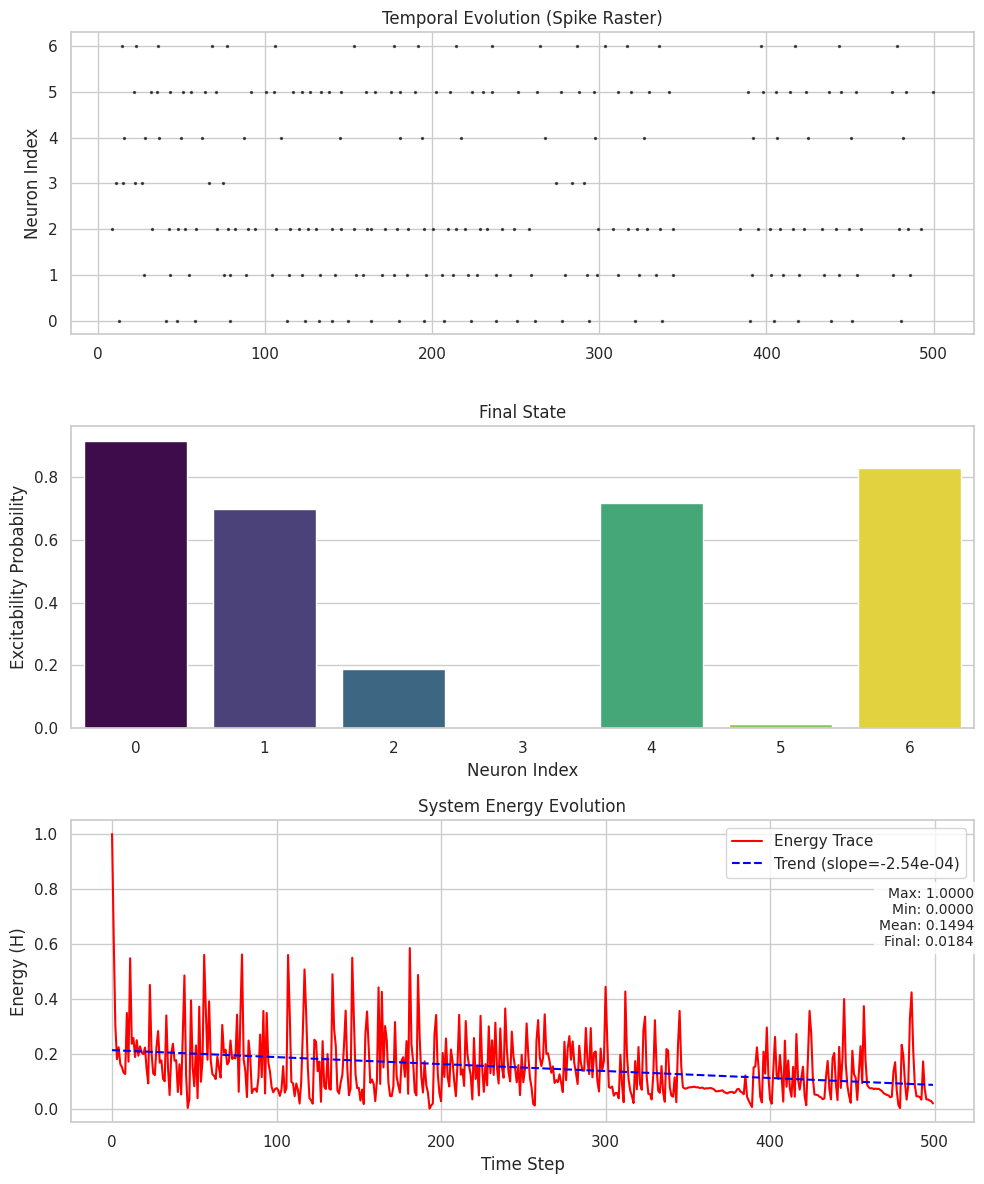

In [3]:
# 2. Create Knapsack Problem
print("Mapping to OPU...")
problem = pk.problems.logistics.Knapsack(items, capacity, penalty)

# 3. Solve
print("Solving...")
# We set the simulation duration to 500ms using the 't' parameter
process = pk.oos.Process(problem, backend='cpu', t=500)
result = process.run()

# 4. Display OPU Dynamics
print("\nVisualizing OPU Dynamics...")
result.plot()

## 3. Solution Analysis

After the simulation, we analyze the final state of the neurons. A neuron in the 'fired' state (value close to 1) indicates that the corresponding item is selected for the knapsack.


Visualizing Solution...


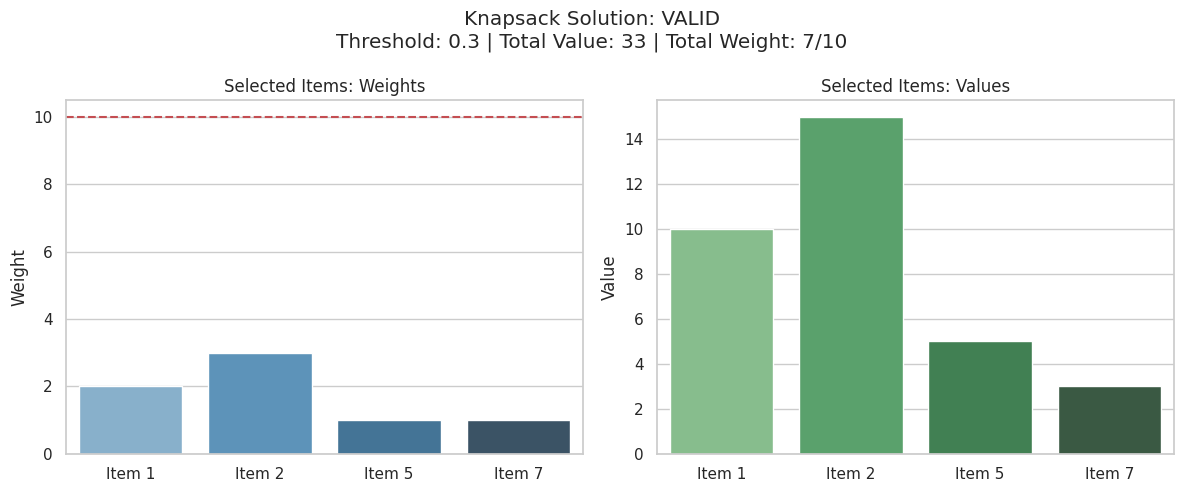

In [4]:
# 5. Analyse and Display Solution
print("\nVisualizing Solution...")
# We use a threshold of 0.3 to determine if an item is selected
# You can run this cell multiple times with different thresholds to explore the solution space
problem.plot(result, threshold=0.3)